# **Ficha 1 - Exercício 7**
## Realizado pelos alunos da licenciatura em Engenharia Física:
### Maria Gabriela Oliveira, A92841;
### Miguel Caçador Peixoto, A92838;






##### 18 de outubro de 2021

## Sabendo que $e^{-x}$ $\approx$ 1 - $x$ + $\frac{x^2}{2!}$ - $\frac{x^3}{3!}$ + ... + $\frac{x^n}{n!}$, calcule  $e^{-x}$ para $x$ = 0,1; 1; 10; 15; 30 requerendo que o erro numérico seja inferior a uma parte em $10^8$ e compare os valores obtidos com os calculados através da função *numpy.exp()*. Represente graficamente a função para $x$ ∈ [0, 30].


Note-se que como alguns valores de $e^{-x}$, para $x$ ∈ [0, 30], são inferiores a $10^{-8}$, assumiu-se que o erro numérico referido acima é um erro relativo. Caso contrário para $x$s grandes o erro exigido não faria qualquer sentido nem garantia fiabilidade nos valores obtidos.

### **MÉTODO 1**
Calculou-se o exponencial de $-x$ de acordo com a série enunciada acima.

De modo a a garantir um erro númerico inferior a $10^{-8}$ definiu-se a função *erro*. Esta calcula o número de termos necessários na série para que o erro seja inferior ao desejado.

In [ ]:
import numpy as np
import math

# Calculo do exponencial
def exponencial(x,n):
    expo=0
    for i in range(n):
        e = ((-x)**i)/(np.math.factorial(i))
        expo+=e
    return expo 

# Erro
def erro(x, precisao=10**(-8)):
    # Se n fosse igual a 1, para x igual 1 existia uma indeterminação.
    n = 2
    # Enquanto a precisão requirida não for alcançada,
    # iremos adicionar mais um termo.
    while (abs(exponencial(x,n+1)-exponencial(x,n))/abs(exponencial(x,n+1)))>=precisao:
        n += 1
    return n+1 

In [ ]:
to_compute = [0.1, 1, 10, 15, 30]

print("-> METODO 1")
for i in to_compute:
  print("-"*10)
  print(f'Exponencial de {i}:\t', exponencial(i,erro(i)))
  print("Nº de termos:\t\t", erro(i))
  print('Função pré-definida:\t', np.exp(-i))

-> METODO 1
----------
Exponencial de 0.1:	 0.9048374180555556
Nº de termos:		 7
Função pré-definida:	 0.9048374180359595
----------
Exponencial de 1:	 0.3678794413212817
Nº de termos:		 13
Função pré-definida:	 0.36787944117144233
----------
Exponencial de 10:	 4.53999293667452e-05
Nº de termos:		 48
Função pré-definida:	 4.5399929762484854e-05
----------
Exponencial de 15:	 3.0593423678230343e-07
Nº de termos:		 67
Função pré-definida:	 3.059023205018258e-07
----------
Exponencial de 30:	 -8.553016424646994e-05
Nº de termos:		 105
Função pré-definida:	 9.357622968840175e-14


### Explorando a função...

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def iteractive_plot(terms, max_x):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get x
    x = np.linspace(0, max_x, num=1000)

    # Get the values of our function and plot it
    y = [exponencial(i, terms) for i in x]
    ax.plot(x, y, label="Aproximated exponential")

    # Get the values from the numpy function and plot it
    y_real = [np.exp(-i) for i in x]
    ax.plot(x, y_real, label="Exponential", color='g')
    plt.legend(loc='upper left')
    ax.set_ylabel('e^(-x)')

    # Plot the error
    ax_err = ax.twinx()
    ax_err.set_ylabel('Error')
    y_error = [abs((y[i]-y_real[i])/y_real[i]) for i in range(len(x))]
    ax_err.plot(x, y_error, label="Error", color='r', alpha=0.3)
    plt.axhline(y=10**(-8),label="reference", color='gray')
    ax_err.set_yscale('log')
    fig.tight_layout()
    plt.legend(loc='upper right')

    return()

    
interact(iteractive_plot, terms=(1,105,1), max_x=(1,30,1))

interactive(children=(IntSlider(value=53, description='terms', max=105, min=1), IntSlider(value=15, descriptio…

<function __main__.iteractive_plot>

Olhando para o gráfico acima, com ambos os cursores no máximo ($x$ ∈ [0, 30] e o número de termos que supostamente garante um erro númerico inferior a $10^{-8}$ que é de 105) podem-se analisar os seguintes pontos:


1.   O gráfico da exponecial definida pelo método 1 e a fornecida pelo numpy são equivalentes em termos de morfologia.
2.   O erro (linha vermelha), definido como o módulo da diferença entre a função definida pelo método 1 e a fornecida pelo numpy, apresenta "ruído". Este ruído deve-se ao facto dos erros serem valores relativamente pequenos e a escala utilizada ser logaritmica. Quando se tenta computar o logaritmo de um valor próximo de 0, há alguns problemas que se traduzem neste ruído.
3.   Não se conseguiu garantir o erro numérico desejado para valores de x superiores a aproximadamente 20 (olhar à intersecção da linha de referência com a linha do erro). A explicação deste problema é um pouco mais complexa uma vez que implica conhecimento do conceito de perda de significância (ou cancelamento catastrófico), por este motivo será feita abaixo.


As máquinas representam todos os numéros numa sequência de dígitos em base binária (1 e 0). Muitas frações decimais não podem ser representadas exatamente como frações binárias. Assim, o que realmente se utiliza são aproximações do valor decimal em causa. Estas aproximações são muito pequenas e em casos isolados podem parecer insignificantes. No entanto, tal como no caso deste problema, quando se fazem operações com números decimais estas aproximações acumulam e geram erros associados maiores (face ao valor real). Este problema pode ser visualido abaixo. Como 0.1 é a apenas uma aproximação (segundo a máquina), 0.1+0.1+0.1 para a máquina não corresponde a 0.3, mas na base decimal essa correspondência é claramente verdadeira.

Para além deste problema, como a série calculada na função *exponencial* tem não só somas mas também subtrações, existe um outro problema associado conhecido como cancelamento catastrófico. O cancelamento catastrófico (ou perda de significância) é um efeito que ocorre em operações envolvendo aritmética de ponto flutuante, sendo caracterizado por um aumento substancial do erro relativo nos resultados destas. Este tipo de erro acontece quando há a subtração de dois números muito próximos, especialmente se o módulo dos números em causa for grande. 

Olhando ao gráfico e analisando os resultados, verifica-se que estes problemas contribuem para um impacto substancial e indesejado quando o x é superior a 10.




In [ ]:
0.1+0.1+0.1==0.3

False

In [ ]:
0.1+0.1+0.1

0.30000000000000004

## **METODO 2**
Calculou-se o exponencial de  x  de acordo com a série $e^{x}$ $\approx$ 1 + $x$ + $\frac{x^2}{2!}$ + $\frac{x^3}{3!}$ + ...  + $\frac{x^n}{n!}$ e depois fez-se o inverso do resultado, de modo a obter $e^{-x}$.

De modo a a garantir um erro númerico inferior a  $10^{−8}$  definiu-se a função *erro_improved*, similar à função *erro*.

In [ ]:
import numpy as np
import math

# Calculo do exponencial
def exponencial_improved(x,n):
    expo=0
    for i in range(n):
        e = (x**i)/(np.math.factorial(i))
        expo+=e
    return 1/expo 

#Erro
def erro_improved(x, precisao=10**(-8)):
    n = 1
    # Enquanto a precisão requirida não for alcançada,
    # iremos adicionar mais um termo.
    while (abs(exponencial_improved(x,n+1)-exponencial_improved(x,n))/abs(exponencial_improved(x,n+1)))>=precisao:
        n += 1
    return n+1

In [ ]:
to_compute = [0.1, 1, 10, 15, 30]

print("-> METODO 2")
for i in to_compute:
  print("-"*10)
  print(f'Exponencial de {i}:\t', exponencial_improved(i,erro_improved(i)))
  print("Nº de termos:\t\t", erro_improved(i))
  print('Função pré-definida:\t', np.exp(-i))

-> METODO 2
----------
Exponencial de 0.1:	 0.9048374180524097
Nº de termos:		 7
Função pré-definida:	 0.9048374180359595
----------
Exponencial de 1:	 0.36787944147737484
Nº de termos:		 12
Função pré-definida:	 0.36787944117144233
----------
Exponencial de 10:	 4.53999298598132e-05
Nº de termos:		 34
Função pré-definida:	 4.5399929762484854e-05
----------
Exponencial de 15:	 3.05902321373904e-07
Nº de termos:		 43
Função pré-definida:	 3.059023205018258e-07
----------
Exponencial de 30:	 9.357623008335511e-14
Nº de termos:		 67
Função pré-definida:	 9.357622968840175e-14


### Explorando a função...

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
import numpy as np
def iteractive_plot(terms, max_x):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get x
    x = np.linspace(0, max_x, num=1000)

    # Get the values of our function and plot it
    y = [exponencial_improved(i, terms) for i in x]
    ax.plot(x, y, label="Aproximated exponential")

    # Get the values from the numpy function and plot it
    y_real = [np.exp(-i) for i in x]
    ax.plot(x, y_real, label="Exponential", color='g')
    plt.legend(loc='upper left')
    ax.set_ylabel('e^(-x)')

    # Plot the error
    ax_err = ax.twinx()
    ax_err.set_ylabel('Error')
    y_error = [abs((y[i]-y_real[i])/y_real[i]) for i in range(len(x))]
    ax_err.plot(x, y_error, label="Error", color='r', alpha=0.3)
    plt.axhline(y=10**(-8),label="reference", color='gray')
    ax_err.set_yscale('log')
    fig.tight_layout()
    plt.legend(loc='upper right')

    return()

    
interact(iteractive_plot, terms=(1,67,1), max_x=(1,30,1))

interactive(children=(IntSlider(value=34, description='terms', max=67, min=1), IntSlider(value=15, description…

<function __main__.iteractive_plot>

Olhando para o gráfico acima, com ambos os cursores no máximo ($x$ ∈ [0, 30] e o número de termos que supostamente garante um erro númerico inferior a $10^{-8}$ que é de 67) podem-se analisar os seguintes pontos:


1.   O gráfico da exponecial definida pelo método 2 e a fornecida pelo numpy são equivalentes tanto em termos de morfologia como de valores (erro muito pequeno).
2.   O erro (linha vermelha) apresenta "ruído" ainda maior, uma vez que o erro aqui é ainda mais pequeno (mais próximo de 0).
3.   Conseguiu-se garantir o erro inferior ao desejado para todos os pontos. Similarmente à explicação para o método 1, ao fazer-se uma série com apenas somas (e não subtrações), os erros associados ao cancelamento catastrófico deixam de se fazer sentir de forma tão acentuada. Daí, para este caso, os resultados são muitos melhores e mais fiavéis.






## **METODO 1 vs METODO 2 vs NUMPY**

Comparando as várias funções

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def iteractive_plot(terms, max_x):
    fig, ax = plt.subplots(figsize=(10,7))

    x = np.linspace(0, max_x, num=1000) 
    y = [exponencial(i, terms) for i in x]
    ax.plot(x, y, label="Metodo 1")


    y_improved = [exponencial_improved(i, terms) for i in x]
    ax.plot(x, y_improved, label="Metodo 2", color='m')


    y_real = [np.exp(-i) for i in x]
    ax.plot(x, y_real, label="Numpy", color='g')
    plt.legend(loc='upper left')

    ax.set_ylabel('e^(-x)')

    # error
    ax_err = ax.twinx()
    ax_err.set_ylabel('Error')

    y_error = [abs((y[i]-y_real[i])/y_real[i]) for i in range(len(x))]
    ax_err.plot(x, y_error, label="Erro Metodo 1", color='r', alpha=0.3)

    y_error = [abs((y_improved[i]-y_real[i])/y_real[i]) for i in range(len(x))]
    ax_err.plot(x, y_error, label="Erro Metodo 2", color='orange', alpha=0.3)

    plt.axhline(y=10**(-8),label="reference",color='gray', alpha=0.3)

    ax_err.set_yscale('log')
    plt.legend(loc='upper right')
    fig.tight_layout()
    

    return()

    
interact(iteractive_plot, terms=(1,105,1), max_x=(1,30,1))

interactive(children=(IntSlider(value=53, description='terms', max=105, min=1), IntSlider(value=15, descriptio…

<function __main__.iteractive_plot>

Este gráfico não introduz nenhuma conclusão ou análise nova ao trabalho. Apenas é uma outra visualização das soluções encontradas.

## Plot da melhor função para $x \epsilon [0,30]$

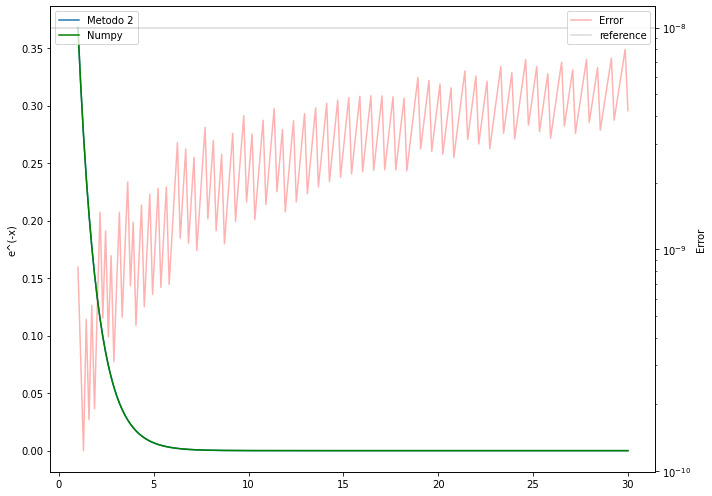

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

# Get x
x = np.linspace(1, 30, 200)

# Get the values of our function and plot it
y = [exponencial_improved(i,erro_improved(i)) for i in x]
ax.plot(x, y, label="Metodo 2")

# Get the values from the numpy function and plot it
y_real = [np.exp(-i) for i in x]
ax.plot(x, y_real, label="Numpy", color='g')
plt.legend(loc='upper left')
ax.set_ylabel('e^(-x)')

# Plot the error
ax_err = ax.twinx()
ax_err.set_ylabel('Error')
y_error = [abs((y[i]-y_real[i])/y_real[i]) for i in range(len(x))]
ax_err.plot(x, y_error, label="Error", color='r', alpha=0.3)


plt.axhline(y=10**(-8),label="reference",color='gray', alpha=0.3)

ax_err.set_yscale('log')
fig.tight_layout()
plt.legend(loc='upper right')


Neste último caso, e como complemento ao trabalho já realizado, fez-se o gráfico da melhor solução (método 2) mas com uma pequena diferença face aos gráficos anteriores. Neste caso o número de termos não é fixo, mas sim o número mínimo de termos para cada valor de $x$ que garante o erro numérico desejado.
Desta forma temos o gráfico do exponencial, usando sempre o numero minimo de termos necessário para garantir o erro requirido em cada ponto. Como podemos ver o erro encontra-se sempre a baixo da linha do erro requirido.